Script for plotting evolution of system indicators for single replication of the experiment

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
scenario_name = 'sp-repl_id-0'
result_path = os.path.join('..','..','..','results',scenario_name)
# Load params
with open(os.path.join(result_path,'0_params.json')) as f:
   params = json.load(f)

In [3]:
# Load relevant csv's: market shares and credit market indicators
market_shares = pd.read_csv(os.path.join(result_path,'5_conv-indicators.csv'))
tmc_indicators = pd.read_csv(os.path.join(result_path,'6_tmc-indicators.csv'))
market_shares.index.name = 'day'
tmc_indicators.index.name = 'day'

In [4]:
evo_df = market_shares[['ptcp_dem_sh_0','ptcp_dem_sh_1','bike','car','pt','not_enough_credit']].copy()
evo_df = evo_df.rename(columns={'ptcp_dem_sh_0': 'rh_solo', 'ptcp_dem_sh_1': 'rh_pool'})
evo_df = pd.concat([evo_df, tmc_indicators], axis=1)

In [5]:
evo_df

,rh_solo,rh_pool,bike,car,pt,not_enough_credit,price,transaction_volume,oversupply,mean_balance
day,,,,,,,,,,
0,33,105,650,131,81,0,0.12,983,-1234,18.234
1,40,94,648,140,78,0,0.12,1008,632,16.368
2,52,93,648,116,91,0,0.13,1309,329,14.671
3,45,97,648,133,77,0,0.14,1336,155,12.845
4,47,86,648,136,83,0,0.15,1347,5,10.995
5,38,93,649,143,77,0,0.17,1260,-112,9.112
6,53,108,696,13,130,0,0.18,411,-371,8.371
7,46,122,710,0,122,0,0.18,333,225,7.775
8,51,106,720,0,123,0,0.19,495,-185,7.185


Text(0, 0.5, 'Transaction volume')

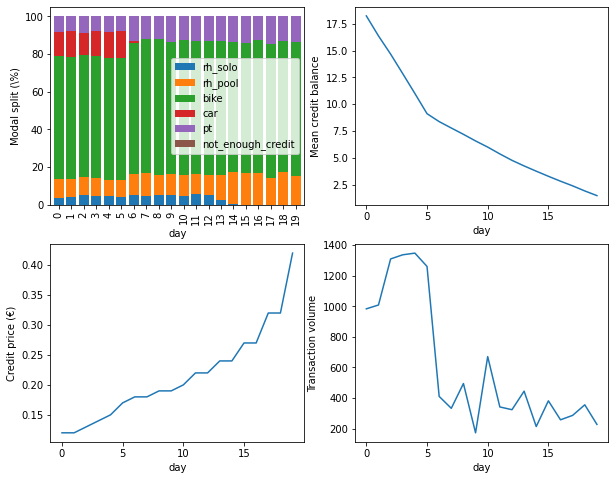

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot 1: market shares
evo_df[['rh_solo','rh_pool','bike','car','pt','not_enough_credit']].div(params['nP']).mul(100).plot(kind='bar', stacked=True, ax=axes[0, 0], width=0.8)
axes[0, 0].set_ylabel('Modal split (\%)')

# Plot 2: mean_balance
evo_df['mean_balance'].plot(ax=axes[0, 1])
axes[0, 1].set_ylabel('Mean credit balance')

# Plot 23: credit_price
evo_df['price'].plot(ax=axes[1, 0])
axes[1, 0].set_ylabel('Credit price (€)')

# Plot 4: transaction volume
evo_df['transaction_volume'].plot(ax=axes[1, 1])
axes[1, 1].set_ylabel('Transaction volume')

In [7]:
evo_df[['rh_solo','rh_pool','bike','car','pt']].sum(axis=1)

day
0     1000
1     1000
2     1000
3     1000
4     1000
5     1000
6     1000
7     1000
8     1000
9     1000
10    1000
11    1000
12    1000
13    1000
14    1000
15    1000
16    1000
17    1000
18    1000
19    1000
dtype: int64

In [8]:
params

{'NAME': 'AMS_TMC',
 'city': 'Amsterdam Noord',
 'nP': 1000,
 'nV': 50,
 'times': {'request': 15,
  'transaction': 20,
  'pickup': 30,
  'dropoff': 10,
  'patience': 600,
  'pickup_patience': 90},
 'speeds': {'walk': 1.2, 'bike': 4.1666667, 'congestion_factor': 0.85},
 't0': '2023-06-13 09:00:00',
 'paths': {'main': '/Users/rkucharski/Documents/GitHub/MaaSSim',
  'data': '/Users/rkucharski/Documents/GitHub/MaaSSim/data',
  'params': 'MaaSSim\\data\\config',
  'G': 'MaaSSim\\data\\graphs\\Amsterdam Noord.graphml',
  'skim': 'MaaSSim\\data\\graphs\\Amsterdam Noord.csv',
  '_ipython_display_': {},
  '_repr_mimebundle_': {},
  '_repr_html_': {},
  '_repr_markdown_': {},
  '_repr_svg_': {},
  '_repr_png_': {},
  '_repr_pdf_': {},
  '_repr_jpeg_': {},
  '_repr_latex_': {},
  '_repr_json_': {},
  '_repr_javascript_': {},
  'fleetpy_config': 'constant_config.csv',
  'requests': 'MaaSSim/data/demand/Amsterdam/albatross/preprocessed.csv',
  'PT_trips': 'MaaSSim/data/demand/Amsterdam/albatross/re